In [1]:
import os
import sys
sys.path.append(os.path.abspath('../../Dynamic_AMM'))
from env.amm import AMM
from env.oracle import OracleSimulator
from env.trader import Arbitrager

In [9]:
oracle = OracleSimulator(fee_rate=0.003, fee_source=1, steps=2000)
trader = Arbitrager(oracle)
swap_infos = []
for _ in range(oracle.steps):
    swap_info = trader.step()
    swap_infos.append(swap_info)


In [14]:
import pandas as pd

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(swap_infos)

# Convert numpy float64 values to regular floats for better display
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype(float)

In [16]:
df.to_csv('arbitrage.csv', index=False)

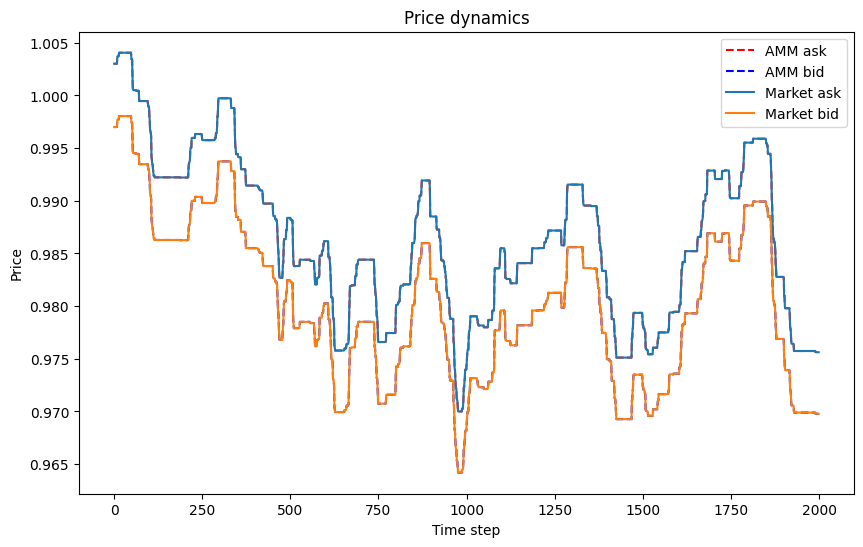

In [ ]:
import matplotlib.pyplot as plt
# draw lines -- for AMM
plt.figure(figsize=(10, 6))
plt.plot(df['amm_ask'], label='AMM ask', color='red', linestyle='--')
plt.plot(df['amm_bid'], label='AMM bid', color='blue', linestyle='--')
plt.plot(df['mkt_ask'], label='Market ask', color='black')
plt.plot(df['mkt_bid'], label='Market bid', color='black')
plt.legend()
plt.title('Price dynamics')
plt.xlabel('Time step')
plt.ylabel('Price')
plt.show()